<a href="https://colab.research.google.com/github/SakshatVacche/CodSoft/blob/main/MOVIE_RATING_PREDICTION_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving archive (4).zip to archive (4) (6).zip


/tmp/ipython-input-7-1736187095.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna('Unknown')
/tmp/ipython-input-7-1736187095.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipython-input-7-1736187095.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

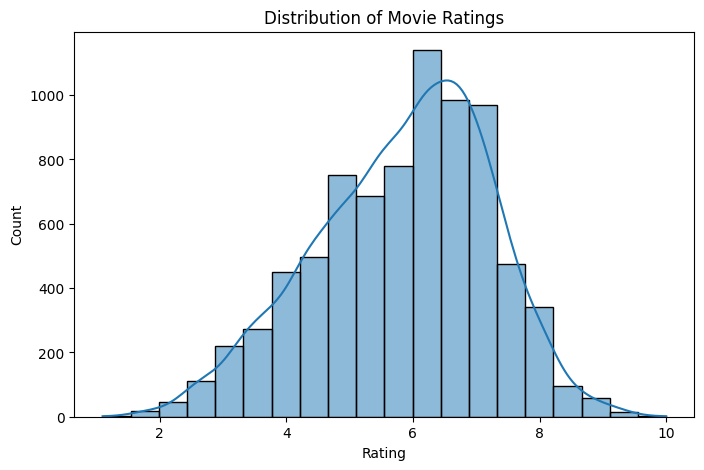

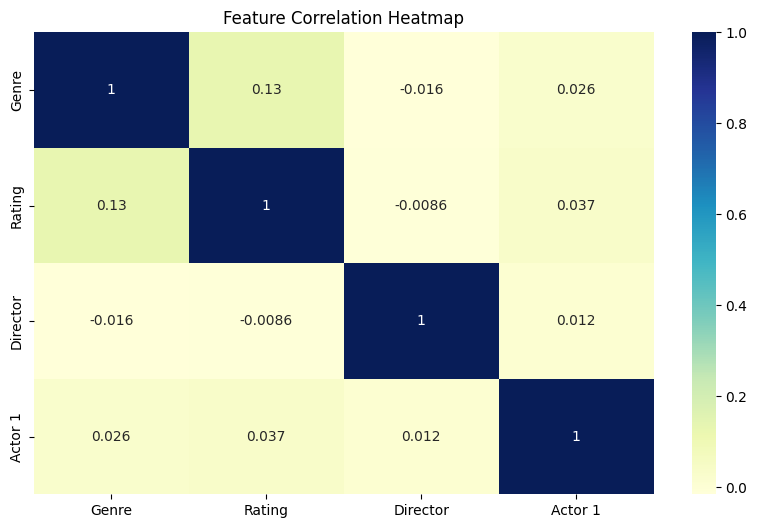

Mean Absolute Error: 1.08
Root Mean Squared Error: 1.35
R² Score: 0.03


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import files
import zipfile, io, glob, os

# Upload and extract the ZIP file
uploaded = files.upload()
z = zipfile.ZipFile(io.BytesIO(uploaded[next(iter(uploaded))]), 'r')
z.extractall("movie_data")
f = glob.glob("movie_data/**/*.csv", recursive=True)[0]

# Load the dataset
df = pd.read_csv(f, encoding='ISO-8859-1')
df.columns = df.columns.str.strip()

# Drop rows with missing ratings
df = df.dropna(subset=['Rating'])

# Fill missing values in relevant categorical columns
for col in ['Genre', 'Director', 'Actor 1']:
    df[col] = df[col].fillna('Unknown')

# Encode categorical features
label_cols = ['Genre', 'Director', 'Actor 1']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# Visualize rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.show()

# Correlation heatmap (only numeric columns)
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap")
plt.show()

# Define features and target
X = df[['Genre', 'Director', 'Actor 1']]
y = df['Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", round(mae, 2))
print("Root Mean Squared Error:", round(rmse, 2))
print("R² Score:", round(r2, 2))
